In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from kaggle.api.kaggle_api_extended import KaggleApi
plt.style.use('seaborn')
sns.set(rc={"figure.figsize":(12, 7)})

In [ ]:
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_file(
    'abdghuff/spotify-data', 
    file_name='spotify.csv')

False

In [ ]:
from zipfile import ZipFile
with ZipFile('spotify.csv.zip', 'r') as zip:
    zip.printdir()
    print('Extracting all the files...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
spotify.csv                                    2022-01-15 12:44:04     33089392
Extracting all the files...
Done!


In [2]:
df = pd.read_csv('spotify.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df.shape

(174389, 19)

In [3]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [4]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

# Duration

In [7]:
df_dated = df.copy()
df_dated.set_index('year', inplace=True)
df_dated.head()


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
year,,,,,,,,,,,,,,,,,,
1920,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340
1920,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500
1920,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890
1920,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422
1920,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990


In [8]:
df_dated['minutos'] = round(df_dated['duration_ms'] / 60000, 2)
df_dated.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,minutos
year,,,,,,,,,,,,,,,,,,,
1920,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,2.81
1920,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,2.50
1920,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,2.73
1920,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,7.03
1920,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,2.75


Text(0.5, 0, 'Duración')

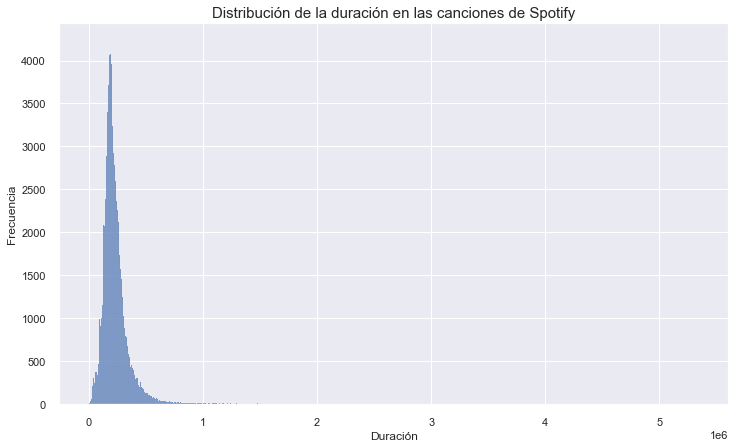

In [ ]:
sns.histplot(data=df, x=df['duration_ms'])
plt.title('Distribución de la duración en las canciones de Spotify', fontdict={'fontsize':15})
plt.ylabel('Frecuencia')
plt.xlabel('Duración')

In [11]:
df_dated[df_dated.index == 2010].minutos.mean()

4.452876083630801

In [13]:
duration_mean = []
range_pure = df_dated.index.sort_values().unique()

for i in range_pure:
    duration_mean.append(round(df_dated[df_dated.index == i].minutos.mean(), 2))

print(duration_mean)

[3.97, 4.3, 2.34, 2.97, 3.18, 3.08, 2.63, 2.94, 3.57, 2.81, 3.24, 2.86, 2.91, 3.27, 3.16, 3.69, 2.88, 3.72, 4.13, 3.68, 3.03, 3.36, 3.7, 3.99, 4.07, 3.26, 4.45, 3.87, 3.34, 3.72, 3.47, 3.55, 3.85, 3.61, 3.77, 3.67, 3.53, 4.0, 3.56, 3.53, 3.5, 3.9, 3.44, 3.36, 3.26, 3.3, 3.45, 3.31, 3.56, 3.98, 4.06, 4.32, 4.12, 4.26, 4.16, 4.24, 4.46, 4.27, 4.13, 4.18, 4.18, 4.16, 4.12, 4.16, 4.21, 4.19, 4.22, 4.11, 4.25, 4.2, 4.27, 3.98, 4.07, 4.13, 4.19, 4.1, 4.19, 4.09, 4.16, 4.04, 4.06, 4.01, 4.04, 4.07, 3.83, 3.82, 3.87, 4.07, 3.8, 4.09, 4.45, 4.66, 4.25, 4.75, 4.41, 4.38, 4.3, 4.06, 3.78, 3.76, 3.65, 3.71]


Text(0.5, 0, 'Año')

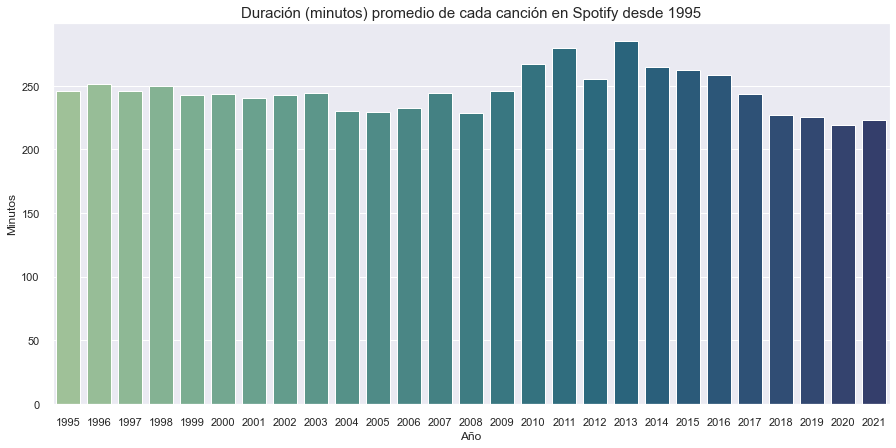

In [17]:
plt.figure(figsize = (15,7))
sns.barplot(x = range_pure[75:], y = duration_mean[75:], palette='crest')
plt.title('Duración (minutos) promedio de cada canción en Spotify desde 1995', fontdict={'fontsize':15})
plt.ylabel('Minutos')
plt.xlabel('Año')

Text(0.5, 0, 'Año')

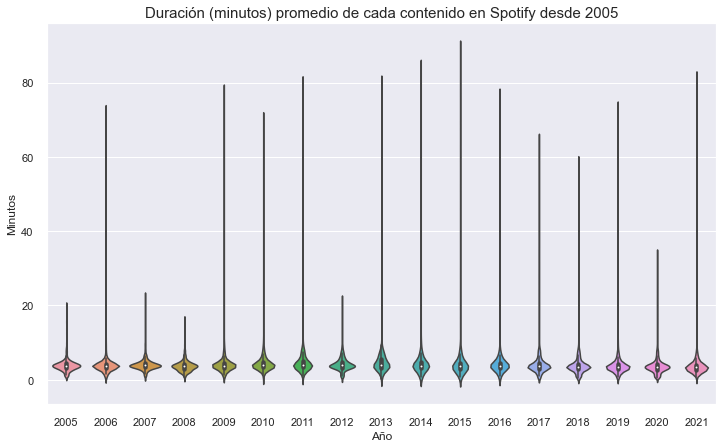

In [18]:
sns.violinplot(
    x = df_dated[df_dated.index > 2004].sort_index().index,
    y = df_dated[df_dated.index > 2004].sort_index().minutos)

plt.title('Duración (minutos) promedio de cada contenido en Spotify desde 2005', fontdict={'fontsize':15})
plt.ylabel('Minutos')
plt.xlabel('Año')

In [6]:
media = df_dated[df_dated.index > 2004].minutos.sort_index().mean()
desv = df_dated[df_dated.index > 2004].minutos.sort_index().std()

sigma_pos = media + desv
sigma_neg = media - desv

In [6]:
df_norm=df_dated[df_dated.index > 2004].sort_index()
df_norm.head()


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,minutos
year,,,,,,,,,,,,,,,,,,,,
2005,0.00184,['Avenged Sevenfold'],0.537,421653,0.953,0,6rujTb9hJa0XdUNtPftz4M,0.000035,2,0.334,-4.335,0,Sidewinder,49,2005-06-06,0.0654,123.163,0.397,2005,7.03
2005,0.59800,['System Of A Down'],0.295,320693,0.797,0,0GrHWVTDsaWcD4nrCGr7VE,0.000427,8,0.125,-3.193,0,Lost In Hollywood,64,2005-05-17,0.0301,150.301,0.107,2005,5.34
2005,0.87300,"['Vicente Fernández', 'Alejandro Fernández']",0.333,214213,0.373,0,7yXN5WniQqoKxtFIRQeRkk,0.000026,7,0.357,-6.951,0,Perdón (with Alejandro Fernández) - Remasterizado,54,2005-11-15,0.0280,97.576,0.217,2005,3.57
2005,0.13300,['Daniel Calveti'],0.535,211069,0.537,0,4r5yle9whdWDsA6ApFGaZj,0.000000,0,0.819,-8.262,1,La Niña de tus Ojos,64,2005-05-06,0.0293,135.761,0.300,2005,3.52
2005,0.02180,['Jennifer Lopez'],0.741,225533,0.759,0,0rLzyBecRbTpnBWvMtPVFR,0.000000,0,0.628,-5.096,0,Get Right,56,2005-03-01,0.1200,97.084,0.362,2005,3.76


Text(0.5, 0, 'Año')

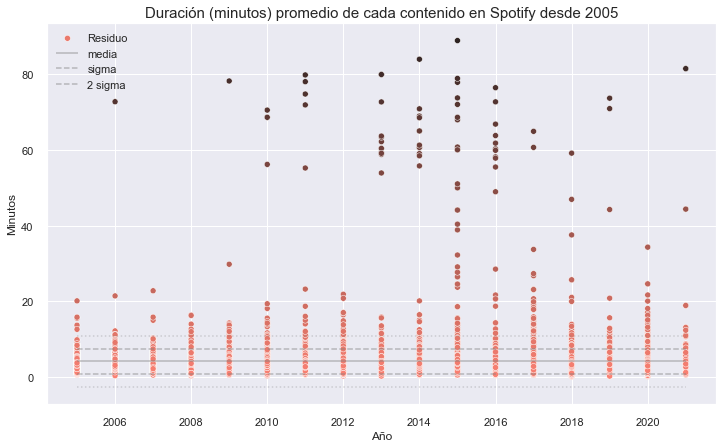

In [ ]:
ax =sns.scatterplot(
    x = df_norm.index,
    y = df_norm.minutos, 
    hue=df_norm.minutos,
    legend=False,
    palette='dark:salmon_r')

ax.hlines(y=media, xmin=2005, xmax=2021, colors='grey', alpha=0.5)
ax.hlines(y=media - desv, xmin=2005, xmax=2021, linestyles='--',colors='grey', alpha=0.5)
ax.hlines(y=media + desv, xmin=2005, xmax=2021, linestyles='--',colors='grey', alpha=0.5)
ax.hlines(y=media - 2*desv, xmin=2005, xmax=2021, linestyles=':',colors='grey', alpha=0.3)
ax.hlines(y=media + 2*desv, xmin=2005, xmax=2021, linestyles=':',colors='grey', alpha=0.3)
ax.legend(['Residuo', 'media', 'sigma', '2 sigma'])


plt.title('Duración (minutos) promedio de cada contenido en Spotify desde 2005', fontdict={'fontsize':15})
plt.ylabel('Minutos')
plt.xlabel('Año')

# Popularity

In [ ]:
df_norm.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'minutos'],
      dtype='object')

In [7]:
df_caracteritics = df_norm[[
    'danceability', 'energy', 'liveness', 'loudness', 
    'popularity', 'speechiness', 'tempo', 'year'
    ]]
df_caracteritics.reset_index(drop=True, inplace=True)

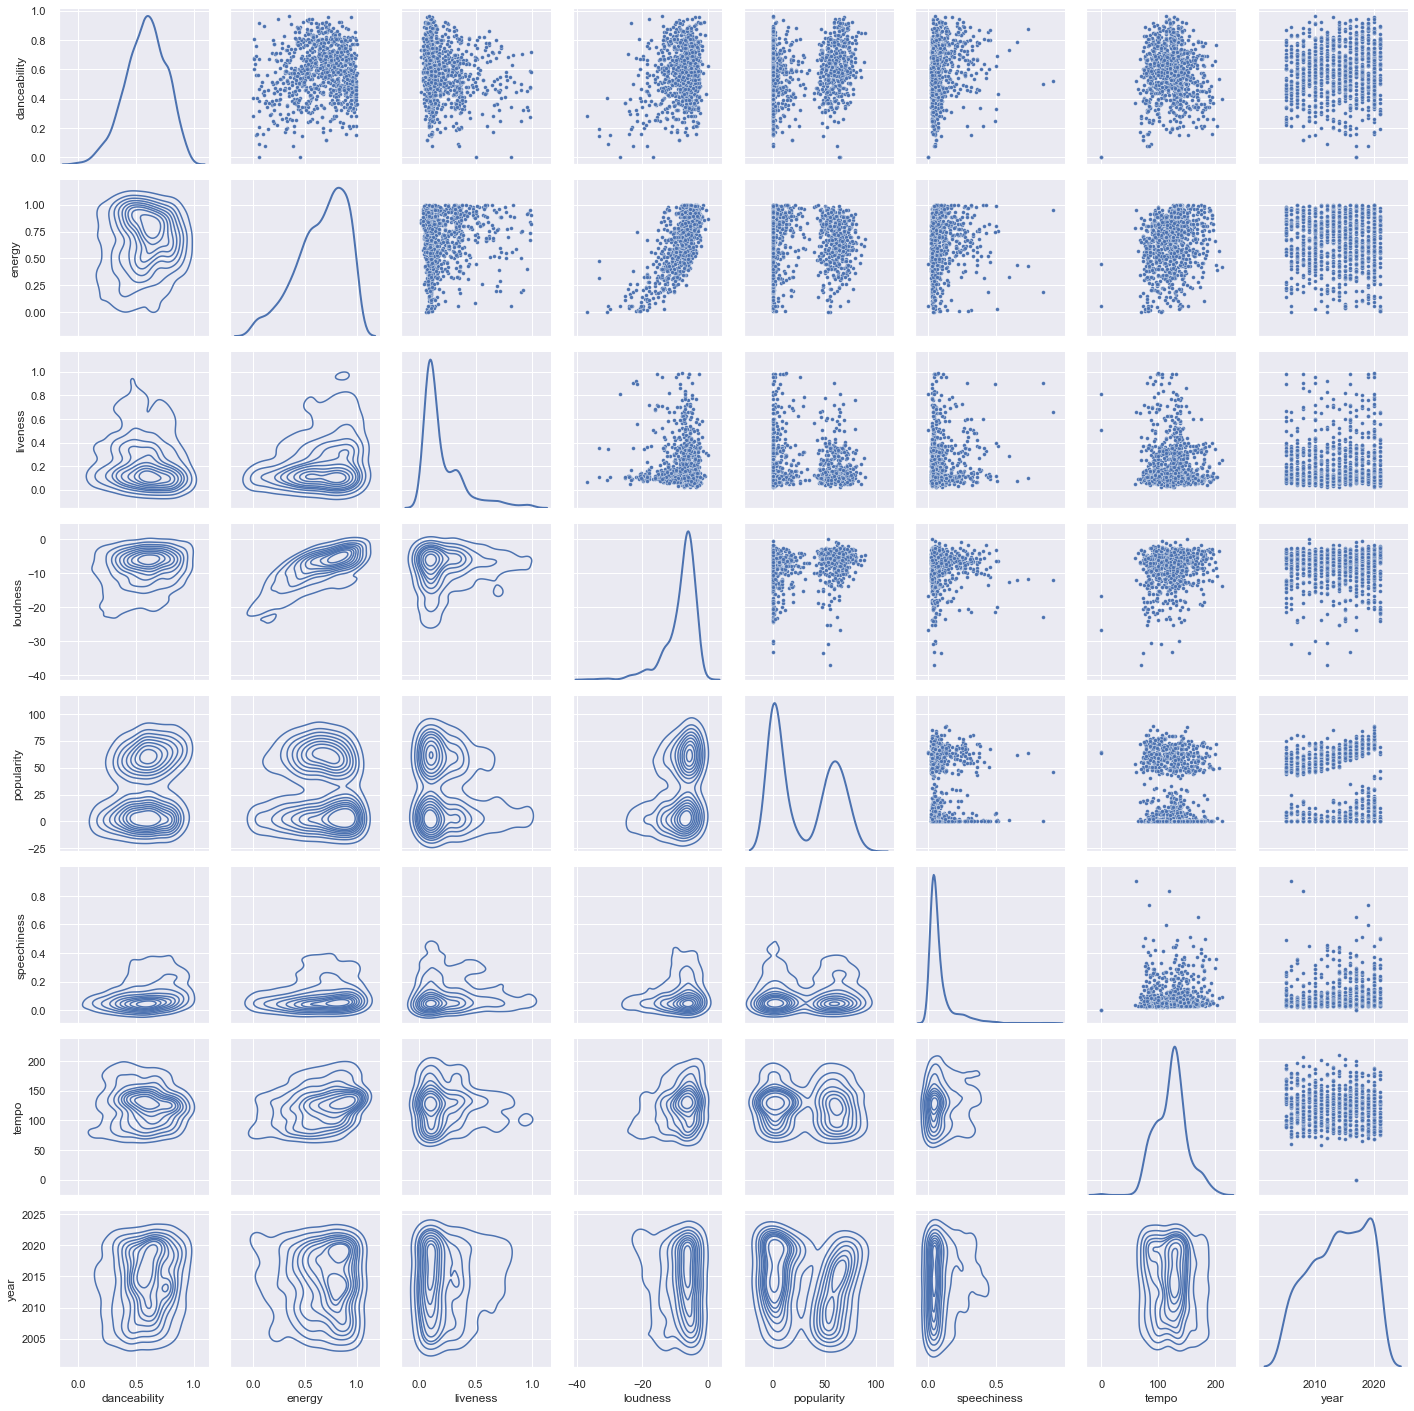

In [ ]:
g = sns.PairGrid(df_caracteritics.sample(1000), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

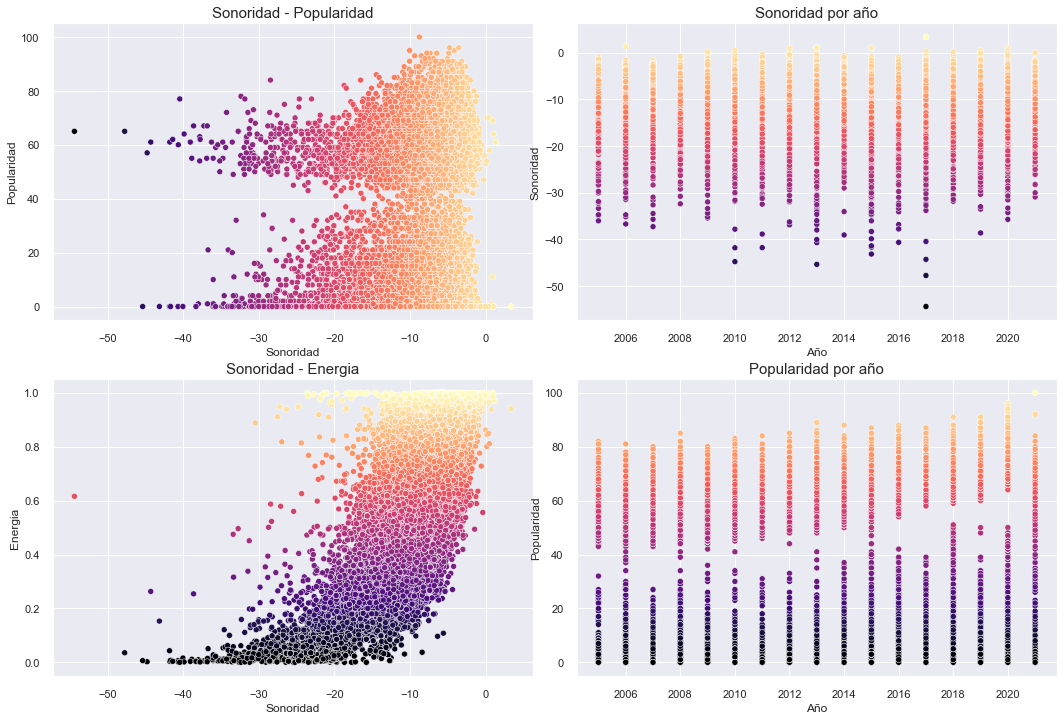

In [11]:
fig, ax = plt.subplots(figsize=(18,12))

ax1 = plt.subplot2grid(shape=(2,4), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid(shape=(2,4), loc=(0,2), colspan=2)
ax3 = plt.subplot2grid(shape=(2,4), loc=(1,0), colspan=2)
ax4 = plt.subplot2grid(shape=(2,4), loc=(1,2), colspan=2)

ax1 = sns.scatterplot(
    data=df_norm, 
    x = 'loudness',
    y = 'popularity',
    hue='loudness',
    palette='magma',
    legend=False,
    ax=ax1
)
ax1.set_title('Sonoridad - Popularidad', fontdict={'fontsize':15})
ax1.set_xlabel('Sonoridad')
ax1.set_ylabel('Popularidad')

ax2 = sns.scatterplot(
    data=df_norm,
    x = 'year',
    y = 'loudness',
    hue = 'loudness',
    palette='magma',
    legend=False,
    ax=ax2
)
ax2.set_title('Sonoridad por año', fontdict={'fontsize':15})
ax2.set_xlabel('Año')
ax2.set_ylabel('Sonoridad')

ax3 = sns.scatterplot(
    data = df_norm,
    x = 'loudness', 
    y = 'energy', 
    hue = 'energy',
    palette='magma',
    legend=False,
    ax=ax3
)
ax3.set_title('Sonoridad - Energia', fontdict={'fontsize':15})
ax3.set_xlabel('Sonoridad')
ax3.set_ylabel('Energia')

ax4 = sns.scatterplot(
    data=df_norm,
    x = 'year',
    y = 'popularity',
    hue = 'popularity',
    palette='magma',
    legend=False,
    ax=ax4
)
ax4.set_title('Popularidad por año', fontdict={'fontsize':15})
ax4.set_xlabel('Año')
ax4.set_ylabel('Popularidad')

plt.show()




## Regresion de caracteristicas

In [8]:
df_caracteritics.sort_values(by='year', inplace = True)
df_caracteritics.head()

C:\Users\PC i3\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,danceability,energy,liveness,loudness,popularity,speechiness,tempo,year
0,0.537,0.953,0.334,-4.335,49,0.0654,123.163,2005
883,0.373,0.977,0.122,-12.141,7,0.0699,138.504,2005
882,0.628,0.215,0.215,-17.784,44,0.0745,118.020,2005
881,0.797,0.711,0.124,-2.975,51,0.3010,90.557,2005
880,0.741,0.703,0.129,-8.321,44,0.1700,95.058,2005


<AxesSubplot:xlabel='year', ylabel='popularity'>

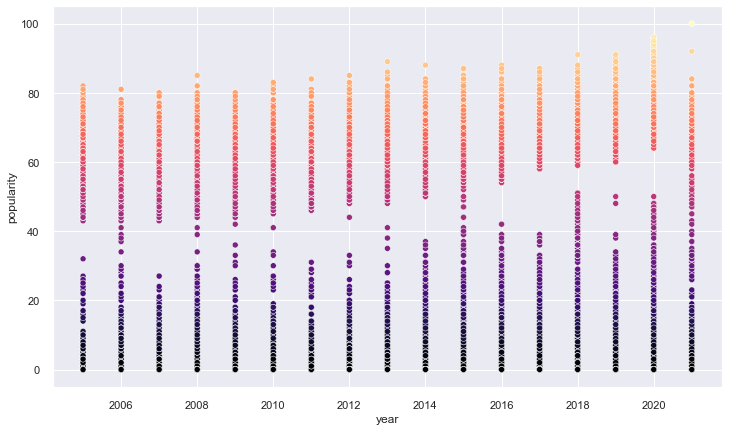

In [39]:
sns.scatterplot(
    data = df_caracteritics,
    palette='magma',
    x = 'year',
    y = 'popularity',
    hue = 'popularity',
    legend=False
)

<AxesSubplot:>

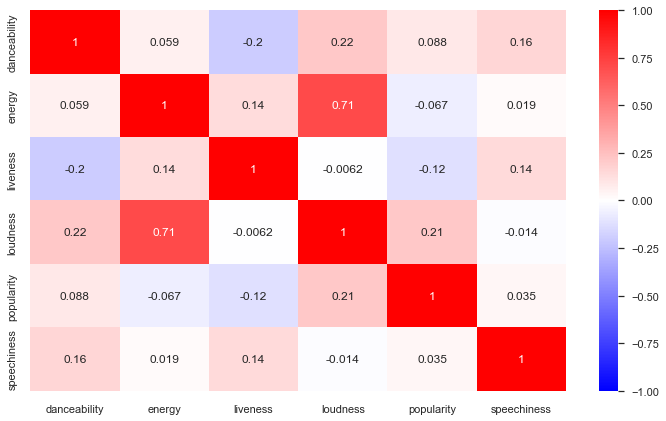

In [42]:
sns.heatmap(df_caracteritics.iloc[:,:6].corr(), annot=True, cmap='bwr', vmax=1, vmin=-1)

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

regresion1 = smf.ols("popularity ~ danceability + energy + liveness + loudness + speechiness + tempo", data = df_caracteritics).fit()
print(regresion1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:56:19   Log-Likelihood:            -1.6933e+05
No. Observations:               35843   AIC:                         3.387e+05
Df Residuals:                   35836   BIC:                         3.387e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      100.5077      1.281     78.479   

In [10]:
y_hat = regresion1.predict()
y = df_caracteritics['popularity']

df_predict = pd.DataFrame(
        {
            'y':y, 
            'y_hat':y_hat,
            'u':y-y_hat,
            'year':df_caracteritics['year']
        }
    )

media = df_predict['u'].mean()
desv = df_predict['u'].std()

sigma_neg = media - desv
sigma_pos = media + desv

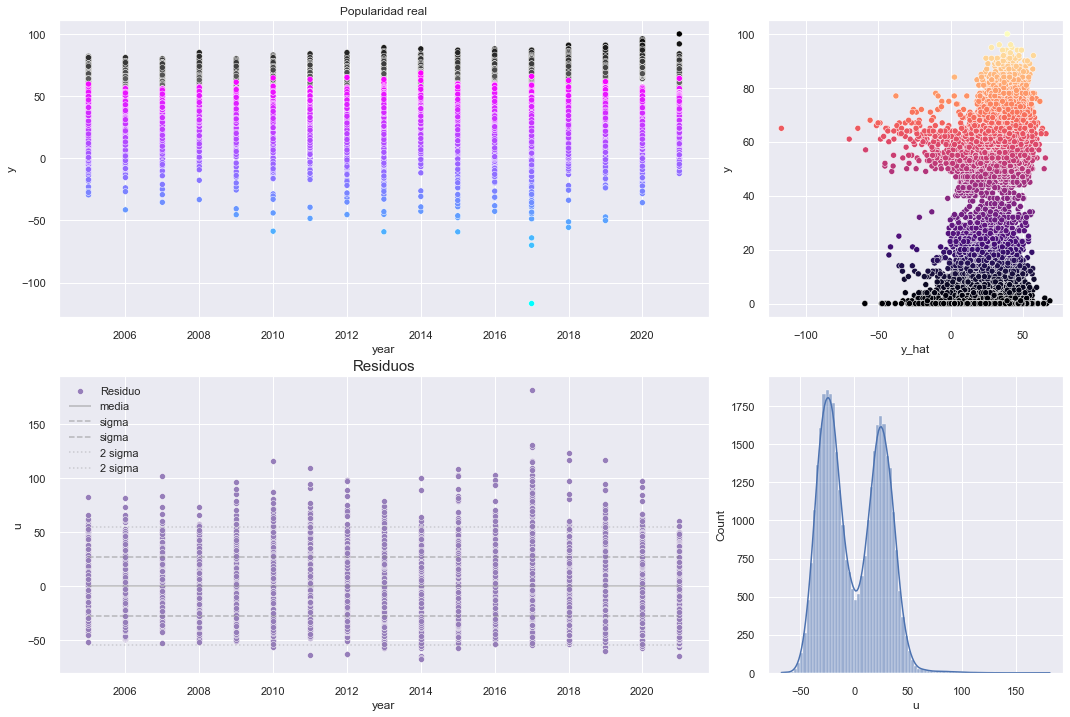

In [14]:
fig, ax = plt.subplots(figsize = (18,12))

ax1 = plt.subplot2grid(shape=(2,3), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid(shape=(2,3), loc=(0,2))
ax3 = plt.subplot2grid(shape=(2,3), loc=(1,0), colspan=2)
ax4 = plt.subplot2grid(shape=(2,3), loc=(1,2))

ax1 = sns.scatterplot(
    data=df_predict,
    palette='gray_r',
    x = 'year',
    y = 'y',
    hue = 'y',
    legend=False,
    ax=ax1
)
ax1.set_title('Popularidad real')

ax1 = sns.scatterplot(
    data=df_predict,
    palette='cool',
    x = 'year',
    y = 'y_hat',
    hue = 'y_hat',
    legend=False,
    ax=ax1
)

ax2 = sns.scatterplot(
    data=df_predict,
    x='y_hat',
    y='y',
    hue='y',
    palette='magma',
    legend=False,
    ax=ax2
)

ax3 = sns.scatterplot(
    data=df_predict,
    x='year',
    y='u',
    color='#967eba',
    ax=ax3
)
ax3.hlines(media,2005,2021, colors='grey', alpha=0.5)
ax3.hlines(sigma_neg, 2005, 2021, colors='grey', alpha=0.5, linestyles='--')
ax3.hlines(sigma_pos, 2005, 2021, colors='grey', alpha=0.5, linestyles='--')
ax3.hlines(sigma_neg*2, 2005, 2021, colors='grey', alpha=0.3, linestyles=':')
ax3.hlines(sigma_pos*2, 2005, 2021, colors='grey', alpha=0.3, linestyles=':')
ax3.legend(['Residuo', 'media', 'sigma', 'sigma', '2 sigma', '2 sigma'],loc='upper left')
ax3.set_title('Residuos', fontdict={'fontsize':15})

ax4 = sns.histplot(
    data=df_predict,
    x='u',
    kde=True,
    ax=ax4
)
plt.show()

In [27]:
def ArrayCreator(value, range_values):
    temp = []
    for i in range(range_values):
        temp.append(value)
    return temp

[2, 2, 2, 2, 2]


In [86]:
var = sigma_pos*2
var_neg = sigma_neg*2

longitud = len(df_predict[df_predict['u']<var_neg].u)

df_predict_sigma = pd.DataFrame()
df_predict_sigma['u'] = df_predict[df_predict['u']<var_neg].u
df_predict_sigma['sigma_neg_values'] =  ArrayCreator(-1,longitud)
print(df_predict_sigma.head())
print(df_predict_sigma.shape)


               u  sigma_neg_values
8790  -55.767732                -1
10301 -63.460140                -1
12245 -63.035707                -1
12689 -63.035707                -1
13281 -57.324812                -1
(24, 2)


In [87]:
df_predict = pd.merge(df_predict, df_predict_sigma, how='left', on='u')
df_predict

,y,y_hat,u,year,sigma_pos_values,sigma_neg_values
0,49,26.029417,22.970583,2005,NaN,NaN
1,64,39.593315,24.406685,2005,NaN,NaN
2,54,48.381980,5.618020,2005,NaN,NaN
3,64,27.774875,36.225125,2005,NaN,NaN
4,56,31.451691,24.548309,2005,NaN,NaN
...,...,...,...,...,...,...
35848,0,20.650682,-20.650682,2021,NaN,NaN
35849,61,23.848713,37.151287,2021,NaN,NaN
35850,1,38.995077,-37.995077,2021,NaN,NaN
35851,0,24.229990,-24.229990,2021,NaN,NaN


In [88]:
df_predict_test = df_predict.copy()
df_predict_test.head()

,y,y_hat,u,year,sigma_pos_values,sigma_neg_values
0,49,26.029417,22.970583,2005,NaN,NaN
1,64,39.593315,24.406685,2005,NaN,NaN
2,54,48.381980,5.618020,2005,NaN,NaN
3,64,27.774875,36.225125,2005,NaN,NaN
4,56,31.451691,24.548309,2005,NaN,NaN


In [100]:
df_predict_test['sigmas'] = df_predict_test['sigma_pos_values'] + df_predict_test['sigma_neg_values']
df_predict_test

,y,y_hat,u,year,sigma_pos_values,sigma_neg_values,sigmas
0,49,26.029417,22.970583,2005,0.0,0.0,0.0
1,64,39.593315,24.406685,2005,0.0,0.0,0.0
2,54,48.381980,5.618020,2005,0.0,0.0,0.0
3,64,27.774875,36.225125,2005,0.0,0.0,0.0
4,56,31.451691,24.548309,2005,0.0,0.0,0.0
...,...,...,...,...,...,...,...
35848,0,20.650682,-20.650682,2021,0.0,0.0,0.0
35849,61,23.848713,37.151287,2021,0.0,0.0,0.0
35850,1,38.995077,-37.995077,2021,0.0,0.0,0.0
35851,0,24.229990,-24.229990,2021,0.0,0.0,0.0


Text(0.5, 1.0, 'Residuos')

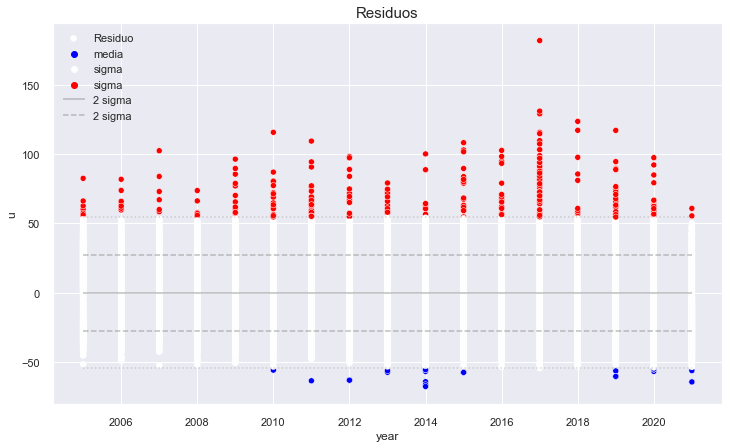

In [108]:
ax3 = sns.scatterplot(
    data=df_predict_test,
    x='year',
    y='u',
    hue='sigmas',
    palette='bwr'
)
ax3.hlines(media,2005,2021, colors='grey', alpha=0.5)
ax3.hlines(sigma_neg, 2005, 2021, colors='grey', alpha=0.5, linestyles='--')
ax3.hlines(sigma_pos, 2005, 2021, colors='grey', alpha=0.5, linestyles='--')
ax3.hlines(sigma_neg*2, 2005, 2021, colors='grey', alpha=0.3, linestyles=':')
ax3.hlines(sigma_pos*2, 2005, 2021, colors='grey', alpha=0.3, linestyles=':')
ax3.legend(['Residuo', 'media', 'sigma', 'sigma', '2 sigma', '2 sigma'],loc='upper left')
ax3.set_title('Residuos', fontdict={'fontsize':15})